<a href="https://colab.research.google.com/github/skdldbwls/predict_mbti_korean/blob/master/mbti_kor_4C_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv("clean_post_5070.csv")
df2 = pd.read_csv("clean_post_7842.csv")
df3 = pd.read_csv("clean_post_16411.csv")
df4 = pd.read_csv("clean_post_18000.csv")

In [ ]:
print(len(df1), len(df2), len(df3), len(df4))

5070 2772 8569 1589


In [ ]:
data = pd.concat([df1,df2,df3,df4], axis=0)
data

,type,posts
0,NaN,최근 카페 질의응답 게시판 지속 등업 요구하다 글 올라오다 있다 엠헬 가입인사 코너...
1,NaN,크 연타 주다 글 자신 마음 안 들다 늘 부족하다 것 같 절대 사랑하다 없 사람 글...
2,NaN,유고슬라비아 남 슬 라브 국가 세르비아 슬로베니아 크로아티아 보스니아 북마케도니아 ...
3,NaN,대 여자 키 크 나이 비하다 성숙하다 이미지 가지다 있다 잇 팁답다 차갑 도도 첫인...
4,NaN,요즘 끌리다 남자 있다 이다 거 같 인줄 알다 상황 따르다 행동 변경 잘 하 고백하...
...,...,...
1584,NaN,글 보다 유형분 조금 더 거절당하다 것 헤어지다 가능 등등 미리 마음 대비 하다 편...
1585,NaN,어떻 매번 검사하다 때 에프제 나오다 결국 에프 제라 것 인정하다 살다 있다 ㅋㅋ ...
1586,NaN,회사 그만두다 말 오늘 대표 꼭 하다 하다 왜 말 안 나오다 왜 죠 왜 그 만두다 ...
1587,NaN,것 도대체 그리고 검사하다 때 계속 나오다 하 거 능력자 분 알리다 주다


In [ ]:
data = data.reset_index(drop=True)
data

,type,posts
0,NaN,최근 카페 질의응답 게시판 지속 등업 요구하다 글 올라오다 있다 엠헬 가입인사 코너...
1,NaN,크 연타 주다 글 자신 마음 안 들다 늘 부족하다 것 같 절대 사랑하다 없 사람 글...
2,NaN,유고슬라비아 남 슬 라브 국가 세르비아 슬로베니아 크로아티아 보스니아 북마케도니아 ...
3,NaN,대 여자 키 크 나이 비하다 성숙하다 이미지 가지다 있다 잇 팁답다 차갑 도도 첫인...
4,NaN,요즘 끌리다 남자 있다 이다 거 같 인줄 알다 상황 따르다 행동 변경 잘 하 고백하...
...,...,...
17995,NaN,글 보다 유형분 조금 더 거절당하다 것 헤어지다 가능 등등 미리 마음 대비 하다 편...
17996,NaN,어떻 매번 검사하다 때 에프제 나오다 결국 에프 제라 것 인정하다 살다 있다 ㅋㅋ ...
17997,NaN,회사 그만두다 말 오늘 대표 꼭 하다 하다 왜 말 안 나오다 왜 죠 왜 그 만두다 ...
17998,NaN,것 도대체 그리고 검사하다 때 계속 나오다 하 거 능력자 분 알리다 주다


In [ ]:
data_type = pd.read_csv("data_winter_final.csv")

In [ ]:
data_type = data_type[data_type.posts.str.len()>50]
data_type = data_type.reset_index(drop=True)
data_type

,type,posts
0,ESTP,1. 최근 카페의 질의응답 게시판에 지속적으로 등업을 요구하는 글이 올라오고 있습니...
1,INFP,"제게 큰 현타를 주었던 글이에요.제 자신이 마음에 안 들고,늘 부족한 것 같고,절대..."
2,ISFJ,"유고슬라비아는 남슬라브 국가들(세르비아, 슬로베니아, 크로아티아, 보스니아, 북마케..."
3,ISTP,10대 여자고 키도 크고 나이에 비해 성숙한 이미지를 가지고 있어요. 잇팁답게 차갑...
4,ISFP,제가 요즘 끌리는 남자가있는데 esfp인거같아요esfj인줄 알았는데 상황에따라 행동...
...,...,...
20747,INFJ,나는 이 카페서 글보고 덧글달고 글쓰는 반면옆의 친구(ISTJ)는 축구보고 뉴스보고...
20748,ENFJ,10년넘은 친구가 있는데 그친구의 성격으로 제가 추측해봤을 때 그 친구는 E*FP였...
20749,INFJ,"구성지음, 갈라놓음. istj가 아닐까요.어느날 제가 목이 말라서 친구녀석에게 물좀..."
20750,ISTJ,이런 유형의 비슷한 질문이 있기는 했지만 대부분 ISTJ 남자와 잘맞을 거 같은 여...


In [ ]:
data.rename(columns = {"posts": "clean_posts"}, inplace=True)

In [ ]:
data['posts'] = data_type['posts'][:18000]

In [ ]:
data['type'] = data_type['type'][:18000]
data

,type,clean_posts,posts
0,ESTP,최근 카페 질의응답 게시판 지속 등업 요구하다 글 올라오다 있다 엠헬 가입인사 코너...,1. 최근 카페의 질의응답 게시판에 지속적으로 등업을 요구하는 글이 올라오고 있습니...
1,INFP,크 연타 주다 글 자신 마음 안 들다 늘 부족하다 것 같 절대 사랑하다 없 사람 글...,"제게 큰 현타를 주었던 글이에요.제 자신이 마음에 안 들고,늘 부족한 것 같고,절대..."
2,ISFJ,유고슬라비아 남 슬 라브 국가 세르비아 슬로베니아 크로아티아 보스니아 북마케도니아 ...,"유고슬라비아는 남슬라브 국가들(세르비아, 슬로베니아, 크로아티아, 보스니아, 북마케..."
3,ISTP,대 여자 키 크 나이 비하다 성숙하다 이미지 가지다 있다 잇 팁답다 차갑 도도 첫인...,10대 여자고 키도 크고 나이에 비해 성숙한 이미지를 가지고 있어요. 잇팁답게 차갑...
4,ISFP,요즘 끌리다 남자 있다 이다 거 같 인줄 알다 상황 따르다 행동 변경 잘 하 고백하...,제가 요즘 끌리는 남자가있는데 esfp인거같아요esfj인줄 알았는데 상황에따라 행동...
...,...,...,...
17995,ENTJ,글 보다 유형분 조금 더 거절당하다 것 헤어지다 가능 등등 미리 마음 대비 하다 편...,"여러 글들을 봤는데infj enfj 유형분들이 조금 더 ""거절 당할 것"" ""헤어질 ..."
17996,ENFJ,어떻 매번 검사하다 때 에프제 나오다 결국 에프 제라 것 인정하다 살다 있다 ㅋㅋ ...,어떤가요?? 저는 매번 검사 할 때마다 엔프제만 나와서 결국 내가 엔프제라는걸 인정...
17997,INFJ,회사 그만두다 말 오늘 대표 꼭 하다 하다 왜 말 안 나오다 왜 죠 왜 그 만두다 ...,"회사 그만둔다는 말 오늘은 대표님께 꼭 하려고했는데요 ,,왜 말이 안나올까요?😱😱왜..."
17998,ENFJ,것 도대체 그리고 검사하다 때 계속 나오다 하 거 능력자 분 알리다 주다,"3w4, 4w5, 6w7 이런건 도대체 뭔지..그리고 저는 검사할때마다 계속 ENF..."


In [ ]:
data.shape

(18000, 3)

In [ ]:
# Split mbti personality into 4 letters and binarize
titles = ["Extraversion (E) - Introversion (I)",
          "Sensation (S) - INtuition (N)",
          "Thinking (T) - Feeling (F)",
          "Judgement (J) - Perception (P)"
         ] 
b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]


#transform mbti to binary vector
def translate_personality(personality):
    return [b_Pers[l] for l in personality]

#transform binary vector to mbti personality
def translate_back(personality):
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in data.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[1 1 1 1]
 [0 0 0 1]
 [0 1 0 0]
 ...
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]]


In [ ]:
data['I-E'] = list_personality_bin[:,0]
data['N-S'] = list_personality_bin[:,1]
data['F-T'] = list_personality_bin[:,2]
data['J-P'] = list_personality_bin[:,3]

In [ ]:
data.head()

,type,clean_posts,posts,I-E,N-S,F-T,J-P
0,ESTP,최근 카페 질의응답 게시판 지속 등업 요구하다 글 올라오다 있다 엠헬 가입인사 코너...,1. 최근 카페의 질의응답 게시판에 지속적으로 등업을 요구하는 글이 올라오고 있습니...,1,1,1,1
1,INFP,크 연타 주다 글 자신 마음 안 들다 늘 부족하다 것 같 절대 사랑하다 없 사람 글...,"제게 큰 현타를 주었던 글이에요.제 자신이 마음에 안 들고,늘 부족한 것 같고,절대...",0,0,0,1
2,ISFJ,유고슬라비아 남 슬 라브 국가 세르비아 슬로베니아 크로아티아 보스니아 북마케도니아 ...,"유고슬라비아는 남슬라브 국가들(세르비아, 슬로베니아, 크로아티아, 보스니아, 북마케...",0,1,0,0
3,ISTP,대 여자 키 크 나이 비하다 성숙하다 이미지 가지다 있다 잇 팁답다 차갑 도도 첫인...,10대 여자고 키도 크고 나이에 비해 성숙한 이미지를 가지고 있어요. 잇팁답게 차갑...,0,1,1,1
4,ISFP,요즘 끌리다 남자 있다 이다 거 같 인줄 알다 상황 따르다 행동 변경 잘 하 고백하...,제가 요즘 끌리는 남자가있는데 esfp인거같아요esfj인줄 알았는데 상황에따라 행동...,0,1,0,1


In [ ]:
data = data[~data['clean_posts'].isnull()]
data = data.reset_index(drop=True)

In [ ]:
data.shape

(17928, 7)

# train / test / validation

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data[['type']]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

X_train =  strat_train_set['clean_posts']
y_train = list_personality_bin[train_index]
X_test = strat_test_set['clean_posts']
y_test = list_personality_bin[test_index]

In [ ]:
print(f"train_articles {len(X_train)}")
print("train_labels", len(y_train))
print("validation_articles", len(X_test))
print("validation_labels", len(y_test))

train_articles 14342
train_labels 14342
validation_articles 3586
validation_labels 3586


In [ ]:

#
from sklearn.feature_extraction.text import TfidfVectorizer
#
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:

categories = ['I-E', 'N-S', 'F-T', 'J-P']

train, test = train_test_split(data, random_state=42, test_size=0.2, shuffle=True)
X_train = train.clean_posts
X_test = test.clean_posts
print(X_train.shape)
print(X_test.shape)

(14342,)
(3586,)


# 모델 훈련

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve

In [ ]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing I-E
Test accuracy is 0.6518813092688895
... Processing N-S
Test accuracy is 0.8311410217191801
... Processing F-T
Test accuracy is 0.6231263383297645
... Processing J-P
Test accuracy is 0.737840318140104


18000

In [ ]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing I-E
Test accuracy is 0.6556051310652538
... Processing N-S
Test accuracy is 0.8039598438371445
... Processing F-T
Test accuracy is 0.5886781929726715
... Processing J-P
Test accuracy is 0.7216954824316788


In [ ]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
total_score = 0
acc =0
for category in categories:
    print('... Processing {}'.format(category))

    NB_pipeline.fit(X_train, train[category])
    prediction = NB_pipeline.predict(X_test)
    score = f1_score(test[category], prediction, average='macro')
    total_score += score
    print('f1_score is {}'.format(score))
    acc += accuracy_score(test[category], prediction)
    print('accuracy is {}'.format(accuracy_score(test[category], prediction)))

    print(confusion_matrix(test[category], prediction))
    print(classification_report(test[category], prediction, target_names=['0', '1']))
    labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    labels = np.asarray(labels).reshape(2,2)
    # sns.heatmap(cf_matrix, annot=labels, fmt=‘’, cmap='Blues')
#     fpr, tpr, thresholds = roc_curve(train[category], NB_pipeline.predict_proba(X_train)[:, 1])
#     plt.plot(fpr, tpr, '-', label=category)

# plt.plot([0, 1], [0, 1], 'k--', label="random guess")
# plt.legend(fontsize = 8)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('MultinomialNB ROC Curve')
# plt.show()

print('Average f1-score of MultinomialNB : ', total_score/4)
print('Average accuracy of MultinomialNB : ', acc/4)

... Processing I-E
f1_score is 0.3963028331292947
accuracy is 0.6518813092688895
[[2129    2]
 [1136    2]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      2131
           1       0.50      0.00      0.00      1138

    accuracy                           0.65      3269
   macro avg       0.58      0.50      0.40      3269
weighted avg       0.60      0.65      0.52      3269

... Processing N-S
f1_score is 0.45389241563648514
accuracy is 0.8311410217191801
[[2717    0]
 [ 552    0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2717
           1       0.00      0.00      0.00       552

    accuracy                           0.83      3269
   macro avg       0.42      0.50      0.45      3269
weighted avg       0.69      0.83      0.75      3269

... Processing F-T


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


f1_score is 0.5764696182702613
accuracy is 0.6231263383297645
[[1561  212]
 [1020  476]]
              precision    recall  f1-score   support

           0       0.60      0.88      0.72      1773
           1       0.69      0.32      0.44      1496

    accuracy                           0.62      3269
   macro avg       0.65      0.60      0.58      3269
weighted avg       0.64      0.62      0.59      3269

... Processing J-P
f1_score is 0.4268428733256858
accuracy is 0.737840318140104
[[   2  857]
 [   0 2410]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       859
           1       0.74      1.00      0.85      2410

    accuracy                           0.74      3269
   macro avg       0.87      0.50      0.43      3269
weighted avg       0.81      0.74      0.63      3269

Average f1-score of MultinomialNB :  0.46337693509043176
Average accuracy of MultinomialNB :  0.7109972468644845


In [ ]:
#18000
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
total_score = 0
acc =0
for category in categories:
    print('... Processing {}'.format(category))

    NB_pipeline.fit(X_train, train[category])
    prediction = NB_pipeline.predict(X_test)
    score = f1_score(test[category], prediction, average='macro')
    total_score += score
    print('f1_score is {}'.format(score))
    acc += accuracy_score(test[category], prediction)
    print('accuracy is {}'.format(accuracy_score(test[category], prediction)))

    print(confusion_matrix(test[category], prediction))
    print(classification_report(test[category], prediction, target_names=['0', '1']))
    labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    labels = np.asarray(labels).reshape(2,2)
    # sns.heatmap(cf_matrix, annot=labels, fmt=‘’, cmap='Blues')
#     fpr, tpr, thresholds = roc_curve(train[category], NB_pipeline.predict_proba(X_train)[:, 1])
#     plt.plot(fpr, tpr, '-', label=category)

# plt.plot([0, 1], [0, 1], 'k--', label="random guess")
# plt.legend(fontsize = 8)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('MultinomialNB ROC Curve')
# plt.show()

print('Average f1-score of MultinomialNB : ', total_score/4)
print('Average accuracy of MultinomialNB : ', acc/4)

... Processing I-E
f1_score is 0.3975353241680335
accuracy is 0.6556051310652538
[[2349    1]
 [1234    2]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      2350
           1       0.67      0.00      0.00      1236

    accuracy                           0.66      3586
   macro avg       0.66      0.50      0.40      3586
weighted avg       0.66      0.66      0.52      3586

... Processing N-S
f1_score is 0.44566393569330653
accuracy is 0.8039598438371445
[[2883    0]
 [ 703    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2883
           1       0.00      0.00      0.00       703

    accuracy                           0.80      3586
   macro avg       0.40      0.50      0.45      3586
weighted avg       0.65      0.80      0.72      3586

... Processing F-T


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


f1_score is 0.44785705151792726
accuracy is 0.5886781929726715
[[1961   55]
 [1420  150]]
              precision    recall  f1-score   support

           0       0.58      0.97      0.73      2016
           1       0.73      0.10      0.17      1570

    accuracy                           0.59      3586
   macro avg       0.66      0.53      0.45      3586
weighted avg       0.65      0.59      0.48      3586

... Processing J-P
f1_score is 0.42112080539083907
accuracy is 0.7216954824316788
[[   2  997]
 [   1 2586]]
              precision    recall  f1-score   support

           0       0.67      0.00      0.00       999
           1       0.72      1.00      0.84      2587

    accuracy                           0.72      3586
   macro avg       0.69      0.50      0.42      3586
weighted avg       0.71      0.72      0.61      3586

Average f1-score of MultinomialNB :  0.4280442791925266
Average accuracy of MultinomialNB :  0.6924846625766872


In [ ]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing I-E
Test accuracy is 0.6332211685530743
... Processing N-S
Test accuracy is 0.8234934230651575
... Processing F-T
Test accuracy is 0.6130315081064546
... Processing J-P
Test accuracy is 0.7100030590394616


... Processing I-E
f1_score is 0.5648226967678112
[[1683  448]
 [ 751  387]]
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      2131
           1       0.46      0.34      0.39      1138

    accuracy                           0.63      3269
   macro avg       0.58      0.56      0.56      3269
weighted avg       0.61      0.63      0.62      3269

... Processing N-S
f1_score is 0.5447225764344025
[[2625   92]
 [ 485   67]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2717
           1       0.42      0.12      0.19       552

    accuracy                           0.82      3269
   macro avg       0.63      0.54      0.54      3269
weighted avg       0.77      0.82      0.78      3269

... Processing F-T
f1_score is 0.6101715494617674
[[1142  631]
 [ 634  862]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1773
      

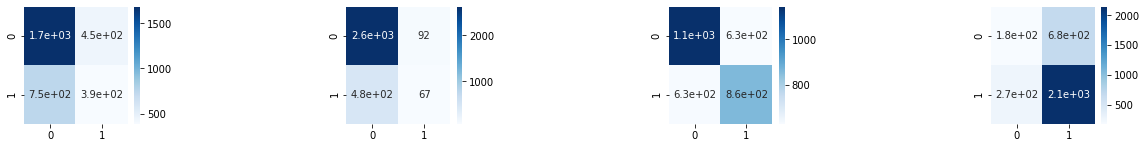

Average f1-score of LinearSVC :  0.566675131604915


In [ ]:
import seaborn as sns
from matplotlib import gridspec

SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1))
])

total_f1_score = 0
total_precision = 0
total_recall = 0

fig = plt.figure(figsize=(18, 16)) 
gs = gridspec.GridSpec(8,8 ) 
n=0
for category in categories:
    print('... Processing {}'.format(category))

    SVC_pipeline.fit(X_train, train[category])
    prediction = SVC_pipeline.predict(X_test)

    f1_score_ = f1_score(test[category], prediction, average='macro')
    # precision_ = precision_score(test[category], prediction)
    # recall_ = recall_score(test[category], prediction)

    total_f1_score += f1_score_
    # total_precision += precision_
    # total_recall += recall_

    print('f1_score is {}'.format(f1_score_))
    # print('precision is {}'.format(precision_))
    # print('recall is {}'.format(recall_))

    cf_matrix = confusion_matrix(test[category], prediction)
    print(cf_matrix)
    print(classification_report(test[category], prediction, target_names=['0', '1']))

    # labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    # labels = np.asarray(labels).reshape(2,2)
    plt.subplot(gs[n*2+0])
    sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    n+=1
    # fpr, tpr, thresholds = roc_curve(train[category], SVC_pipeline.predict_proba(X_train)[:, 1])
    # plt.plot(fpr, tpr, '-', label=category)

# plt.plot([0, 1], [0, 1], 'k--', label="random guess")
# plt.legend(fontsize = 8)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('MultinomialNB ROC Curve')
# plt.show()

plt.tight_layout()  # 창 크기에 맞게 조정
plt.show()
print('Average f1-score of LinearSVC : ', total_f1_score/4)
# print('Average precision of LinearSVC : ', total_precision/4)
# print('Average recall of LinearSVC : ', total_recall/4)

... Processing I-E
f1_score is 0.5771353462520655
[[1908  442]
 [ 814  422]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      2350
           1       0.49      0.34      0.40      1236

    accuracy                           0.65      3586
   macro avg       0.59      0.58      0.58      3586
weighted avg       0.63      0.65      0.63      3586

... Processing N-S
f1_score is 0.6268913639853947
[[2735  148]
 [ 515  188]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2883
           1       0.56      0.27      0.36       703

    accuracy                           0.82      3586
   macro avg       0.70      0.61      0.63      3586
weighted avg       0.79      0.82      0.79      3586

... Processing F-T
f1_score is 0.6186696771489897
[[1471  545]
 [ 774  796]]
              precision    recall  f1-score   support

           0       0.66      0.73      0.69      2016
      

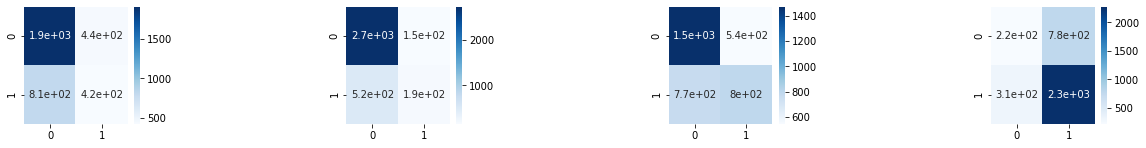

Average f1-score of LinearSVC :  0.5924803329803539


In [ ]:
#18000
import seaborn as sns
from matplotlib import gridspec

SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1))
])

total_f1_score = 0
total_precision = 0
total_recall = 0

fig = plt.figure(figsize=(18, 16)) 
gs = gridspec.GridSpec(8,8 ) 
n=0
for category in categories:
    print('... Processing {}'.format(category))

    SVC_pipeline.fit(X_train, train[category])
    prediction = SVC_pipeline.predict(X_test)

    f1_score_ = f1_score(test[category], prediction, average='macro')
    # precision_ = precision_score(test[category], prediction)
    # recall_ = recall_score(test[category], prediction)

    total_f1_score += f1_score_
    # total_precision += precision_
    # total_recall += recall_

    print('f1_score is {}'.format(f1_score_))
    # print('precision is {}'.format(precision_))
    # print('recall is {}'.format(recall_))

    cf_matrix = confusion_matrix(test[category], prediction)
    print(cf_matrix)
    print(classification_report(test[category], prediction, target_names=['0', '1']))

    # labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    # labels = np.asarray(labels).reshape(2,2)
    plt.subplot(gs[n*2+0])
    sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    n+=1
    # fpr, tpr, thresholds = roc_curve(train[category], SVC_pipeline.predict_proba(X_train)[:, 1])
    # plt.plot(fpr, tpr, '-', label=category)

# plt.plot([0, 1], [0, 1], 'k--', label="random guess")
# plt.legend(fontsize = 8)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('MultinomialNB ROC Curve')
# plt.show()

plt.tight_layout()  # 창 크기에 맞게 조정
plt.show()
print('Average f1-score of LinearSVC : ', total_f1_score/4)
# print('Average precision of LinearSVC : ', total_precision/4)
# print('Average recall of LinearSVC : ', total_recall/4)

In [ ]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing I-E
Test accuracy is 0.6500458855919241
... Processing N-S
Test accuracy is 0.8308351177730193
... Processing F-T
Test accuracy is 0.6191495870296727
... Processing J-P
Test accuracy is 0.7436524931171612


... Processing I-E
              precision    recall  f1-score   support

           0       0.67      0.92      0.77      2131
           1       0.49      0.14      0.22      1138

    accuracy                           0.65      3269
   macro avg       0.58      0.53      0.50      3269
weighted avg       0.61      0.65      0.58      3269

... Processing N-S
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2717
           1       0.45      0.01      0.02       552

    accuracy                           0.83      3269
   macro avg       0.64      0.50      0.46      3269
weighted avg       0.77      0.83      0.76      3269

... Processing F-T
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1773
           1       0.59      0.53      0.56      1496

    accuracy                           0.62      3269
   macro avg       0.62      0.61      0.61      3269
weighted avg     

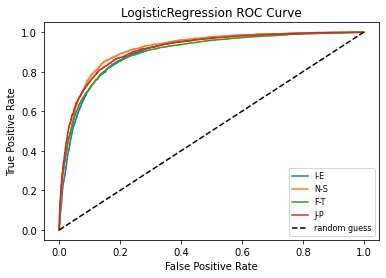

Average f1-score of LogisticRegression :  0.5108302213806717


In [ ]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
total_score = 0
for category in categories:
    print('... Processing {}'.format(category))

    LogReg_pipeline.fit(X_train, train[category])
    prediction = LogReg_pipeline.predict(X_test)
    score = f1_score(test[category], prediction, average='macro')
    total_score += score
    # print('f1_score is {}'.format(score))
    # print('accuracy is {}'.format(accuracy_score(test[category], prediction)))

    # print(confusion_matrix(test[category], prediction))
    print(classification_report(test[category], prediction, target_names=['0', '1']))

    fpr, tpr, thresholds = roc_curve(train[category], LogReg_pipeline.predict_proba(X_train)[:, 1])
    plt.plot(fpr, tpr, '-', label=category)

plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.legend(fontsize = 8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression ROC Curve')
plt.show()

print('Average f1-score of LogisticRegression : ', total_score/4)

... Processing I-E
              precision    recall  f1-score   support

           0       0.67      0.94      0.79      2350
           1       0.54      0.14      0.22      1236

    accuracy                           0.66      3586
   macro avg       0.61      0.54      0.50      3586
weighted avg       0.63      0.66      0.59      3586

... Processing N-S
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2883
           1       0.62      0.03      0.06       703

    accuracy                           0.81      3586
   macro avg       0.72      0.51      0.48      3586
weighted avg       0.77      0.81      0.73      3586

... Processing F-T
              precision    recall  f1-score   support

           0       0.64      0.80      0.71      2016
           1       0.63      0.43      0.51      1570

    accuracy                           0.64      3586
   macro avg       0.64      0.62      0.61      3586
weighted avg     

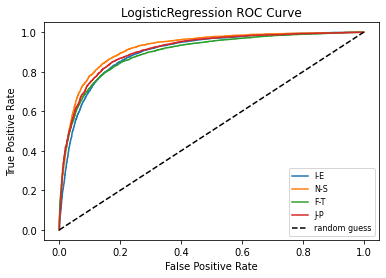

Average f1-score of LogisticRegression :  0.5156618747467581


In [ ]:
# 18000
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
total_score = 0
for category in categories:
    print('... Processing {}'.format(category))

    LogReg_pipeline.fit(X_train, train[category])
    prediction = LogReg_pipeline.predict(X_test)
    score = f1_score(test[category], prediction, average='macro')
    total_score += score
    # print('f1_score is {}'.format(score))
    # print('accuracy is {}'.format(accuracy_score(test[category], prediction)))

    # print(confusion_matrix(test[category], prediction))
    print(classification_report(test[category], prediction, target_names=['0', '1']))

    fpr, tpr, thresholds = roc_curve(train[category], LogReg_pipeline.predict_proba(X_train)[:, 1])
    plt.plot(fpr, tpr, '-', label=category)

plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.legend(fontsize = 8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression ROC Curve')
plt.show()

print('Average f1-score of LogisticRegression : ', total_score/4)

In [ ]:

from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

... Processing I-E
f1_score is 0.44844526931131334
accuracy is 0.6619761394921995
              precision    recall  f1-score   support

           0       0.66      0.98      0.79      2131
           1       0.67      0.06      0.11      1138

    accuracy                           0.66      3269
   macro avg       0.67      0.52      0.45      3269
weighted avg       0.66      0.66      0.55      3269

... Processing N-S
f1_score is 0.45370989304812837
accuracy is 0.8305292138268584
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2717
           1       0.00      0.00      0.00       552

    accuracy                           0.83      3269
   macro avg       0.42      0.50      0.45      3269
weighted avg       0.69      0.83      0.75      3269

... Processing F-T
f1_score is 0.5446713034827686
accuracy is 0.5934536555521567
              precision    recall  f1-score   support

           0       0.59      0.85      0.69   

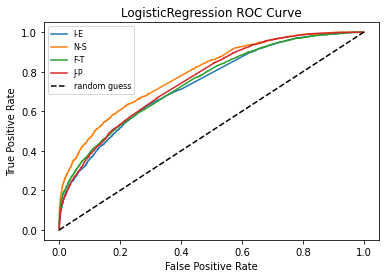

Average f1-score of XGBClassifier :  0.4738057078406781


In [ ]:
XGB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(xgb.XGBClassifier(), n_jobs=1)),
            ])
total_score = 0
for category in categories:
    print('... Processing {}'.format(category))

    XGB_pipeline.fit(X_train, train[category])
    prediction = XGB_pipeline.predict(X_test)
    score = f1_score(test[category], prediction, average='macro')
    total_score += score
    print('f1_score is {}'.format(score))
    print('accuracy is {}'.format(accuracy_score(test[category], prediction)))

    # print(confusion_matrix(test[category], prediction))
    print(classification_report(test[category], prediction, target_names=['0', '1']))

    fpr, tpr, thresholds = roc_curve(train[category], XGB_pipeline.predict_proba(X_train)[:, 1])
    plt.plot(fpr, tpr, '-', label=category)

plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.legend(fontsize = 8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression ROC Curve')
plt.show()

print('Average f1-score of XGBClassifier : ', total_score/4)

... Processing I-E
f1_score is 0.44630755071215755
accuracy is 0.6656441717791411
              precision    recall  f1-score   support

           0       0.66      0.99      0.79      2350
           1       0.70      0.05      0.10      1236

    accuracy                           0.67      3586
   macro avg       0.68      0.52      0.45      3586
weighted avg       0.68      0.67      0.55      3586

... Processing N-S
f1_score is 0.4483694132125077
accuracy is 0.803680981595092
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2883
           1       0.40      0.00      0.01       703

    accuracy                           0.80      3586
   macro avg       0.60      0.50      0.45      3586
weighted avg       0.72      0.80      0.72      3586

... Processing F-T
f1_score is 0.4939400604404755
accuracy is 0.5976017847183491
              precision    recall  f1-score   support

           0       0.59      0.93      0.72     

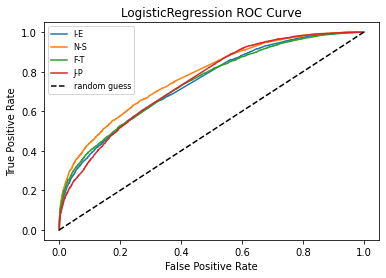

Average f1-score of XGBClassifier :  0.4594850793571944


In [ ]:
#18000
XGB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(xgb.XGBClassifier(), n_jobs=1)),
            ])
total_score = 0
for category in categories:
    print('... Processing {}'.format(category))

    XGB_pipeline.fit(X_train, train[category])
    prediction = XGB_pipeline.predict(X_test)
    score = f1_score(test[category], prediction, average='macro')
    total_score += score
    print('f1_score is {}'.format(score))
    print('accuracy is {}'.format(accuracy_score(test[category], prediction)))

    # print(confusion_matrix(test[category], prediction))
    print(classification_report(test[category], prediction, target_names=['0', '1']))

    fpr, tpr, thresholds = roc_curve(train[category], XGB_pipeline.predict_proba(X_train)[:, 1])
    plt.plot(fpr, tpr, '-', label=category)

plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.legend(fontsize = 8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression ROC Curve')
plt.show()

print('Average f1-score of XGBClassifier : ', total_score/4)

... Processing I-E
f1_score is 0.4904507926871214
accuracy is 0.650657693484246
              precision    recall  f1-score   support

           0       0.67      0.93      0.78      2131
           1       0.49      0.13      0.20      1138

    accuracy                           0.65      3269
   macro avg       0.58      0.53      0.49      3269
weighted avg       0.61      0.65      0.58      3269

... Processing N-S
f1_score is 0.45549297773416175
accuracy is 0.8305292138268584
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2717
           1       0.25      0.00      0.00       552

    accuracy                           0.83      3269
   macro avg       0.54      0.50      0.46      3269
weighted avg       0.73      0.83      0.75      3269

... Processing F-T
f1_score is 0.6105321448586907
accuracy is 0.6176200672988682
              precision    recall  f1-score   support

           0       0.64      0.69      0.66     

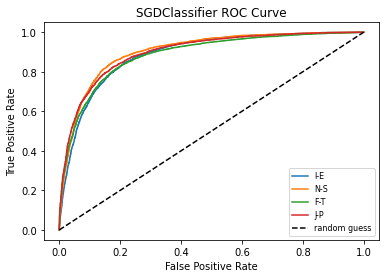

Average f1-score of SGDClassifier :  0.5031844472682218


In [ ]:
SGDClassifier_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(SGDClassifier(loss='log'), n_jobs=1)),
            ])
total_score = 0
for category in categories:
    print('... Processing {}'.format(category))

    SGDClassifier_pipeline.fit(X_train, train[category])
    prediction = SGDClassifier_pipeline.predict(X_test)
    score = f1_score(test[category], prediction, average='macro')
    total_score += score
    print('f1_score is {}'.format(score))
    print('accuracy is {}'.format(accuracy_score(test[category], prediction)))

    # print(confusion_matrix(test[category], prediction))
    print(classification_report(test[category], prediction, target_names=['0', '1']))

    fpr, tpr, thresholds = roc_curve(train[category], SGDClassifier_pipeline.predict_proba(X_train)[:, 1])
    plt.plot(fpr, tpr, '-', label=category)

plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.legend(fontsize = 8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SGDClassifier ROC Curve')
plt.show()

print('Average f1-score of SGDClassifier : ', total_score/4)

... Processing I-E
f1_score is 0.4799900886998784
accuracy is 0.6639709983268266
              precision    recall  f1-score   support

           0       0.67      0.96      0.79      2350
           1       0.57      0.10      0.17      1236

    accuracy                           0.66      3586
   macro avg       0.62      0.53      0.48      3586
weighted avg       0.64      0.66      0.58      3586

... Processing N-S
f1_score is 0.45278378047142537
accuracy is 0.8045175683212493
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2883
           1       0.62      0.01      0.01       703

    accuracy                           0.80      3586
   macro avg       0.71      0.50      0.45      3586
weighted avg       0.77      0.80      0.72      3586

... Processing F-T
f1_score is 0.6111687805529038
accuracy is 0.6411042944785276
              precision    recall  f1-score   support

           0       0.64      0.82      0.72    

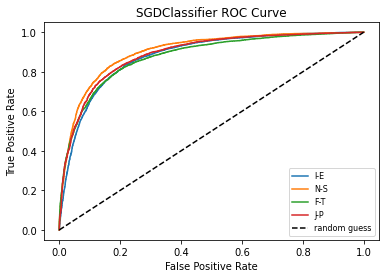

Average f1-score of SGDClassifier :  0.499093083614632


In [ ]:
#18000
SGDClassifier_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(SGDClassifier(loss='log'), n_jobs=1)),
            ])
total_score = 0
for category in categories:
    print('... Processing {}'.format(category))

    SGDClassifier_pipeline.fit(X_train, train[category])
    prediction = SGDClassifier_pipeline.predict(X_test)
    score = f1_score(test[category], prediction, average='macro')
    total_score += score
    print('f1_score is {}'.format(score))
    print('accuracy is {}'.format(accuracy_score(test[category], prediction)))

    # print(confusion_matrix(test[category], prediction))
    print(classification_report(test[category], prediction, target_names=['0', '1']))

    fpr, tpr, thresholds = roc_curve(train[category], SGDClassifier_pipeline.predict_proba(X_train)[:, 1])
    plt.plot(fpr, tpr, '-', label=category)

plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.legend(fontsize = 8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SGDClassifier ROC Curve')
plt.show()

print('Average f1-score of SGDClassifier : ', total_score/4)

# 실제 적용